# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | manta
Processing Record 4 of Set 1 | kalachinsk
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | pyu
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | nadym
Processing Record 12 of Set 1 | valdosta
Processing Record 13 of Set 1 | chegdomyn
Processing Record 14 of Set 1 | kogalym
Processing Record 15 of Set 1 | jamiltepec
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | gisborne
Processing Record 18 of Set 1 | djambala
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | nar'yan-mar
Processing Record 21 of Set 1 | aldan
Processing Record 22 of Set 1 | isafjordur
Processing Record 23

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,38.17,80,100,18.30,TF,1690317766
1,bethel,41.3712,-73.4140,80.96,73,95,4.00,US,1690317893
2,manta,-0.9500,-80.7333,87.58,69,20,10.00,EC,1690317893
3,kalachinsk,55.0529,74.5751,62.33,66,36,6.87,RU,1690317894
4,tiksi,71.6872,128.8694,41.86,74,54,3.02,RU,1690317814


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.17,80,100,18.30,TF,1690317766
1,bethel,41.3712,-73.4140,80.96,73,95,4.00,US,1690317893
2,manta,-0.9500,-80.7333,87.58,69,20,10.00,EC,1690317893
3,kalachinsk,55.0529,74.5751,62.33,66,36,6.87,RU,1690317894
4,tiksi,71.6872,128.8694,41.86,74,54,3.02,RU,1690317814


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

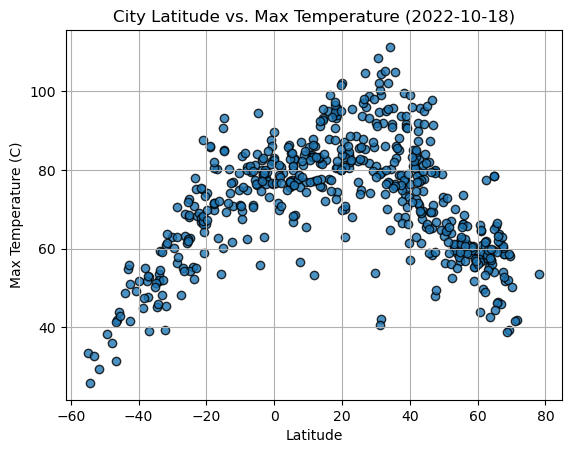

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

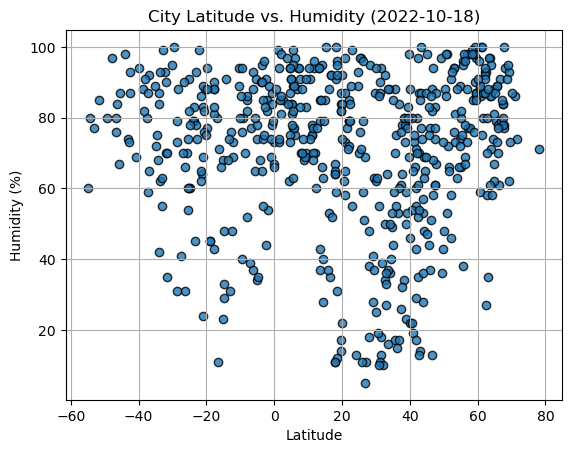

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

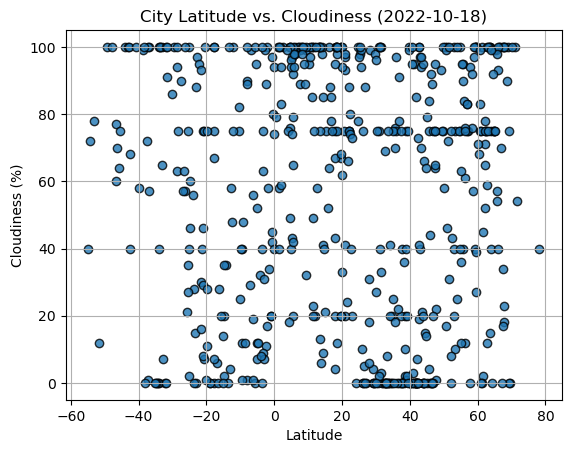

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

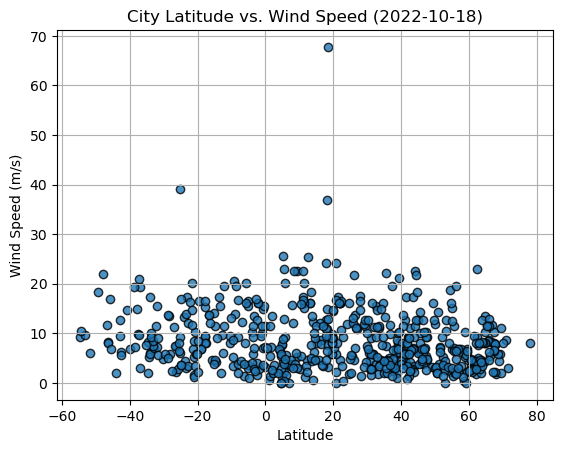

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis,y_axis,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,80.96,73,95,4.00,US,1690317893
3,kalachinsk,55.0529,74.5751,62.33,66,36,6.87,RU,1690317894
4,tiksi,71.6872,128.8694,41.86,74,54,3.02,RU,1690317814
7,pyu,18.4833,96.4333,74.34,96,98,3.29,MM,1690317894
10,nadym,65.5333,72.5167,65.80,79,99,11.63,RU,1690317825


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.17,80,100,18.30,TF,1690317766
2,manta,-0.9500,-80.7333,87.58,69,20,10.00,EC,1690317893
5,kruisfontein,-34.0033,24.7314,51.69,42,0,6.08,ZA,1690317785
6,bredasdorp,-34.5322,20.0403,45.23,75,0,2.06,ZA,1690317894
8,edinburgh of the seven seas,-37.0676,-12.3116,52.88,65,100,19.28,SH,1690317894


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6073678402308788


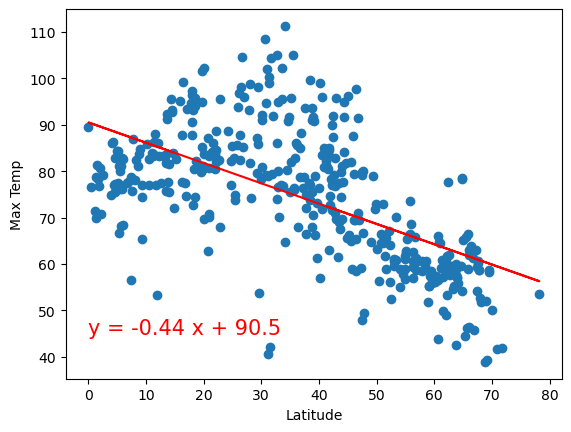

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, 'Max Temp', (0,45))

The r-value is: 0.8528651505880657


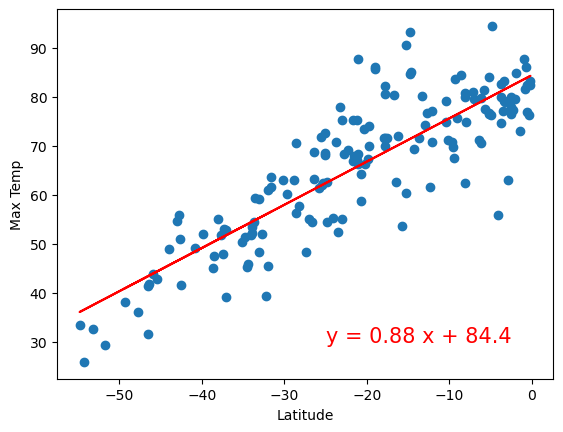

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, 'Max Temp', (-25,30))

**Discussion about the linear relationship:** The linear regression line of temperature vs. latitude in the Northern Hemisphere has a negative linear relationship. The regression line shows that as you move northwards, the temperature decreases by 0.44 units and starts at around 90.5 degrees when the latitude is 0. The linear regression line of temperature vs. latitude in the Southern Hemisphere has a positive linear relationship. The regression line shows that as you move southwards, the maximum temperature tends to increase by 0.88 units per latitude degree and starts at around 84.4 degrees when the latitude is 0 at the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06310904733753216


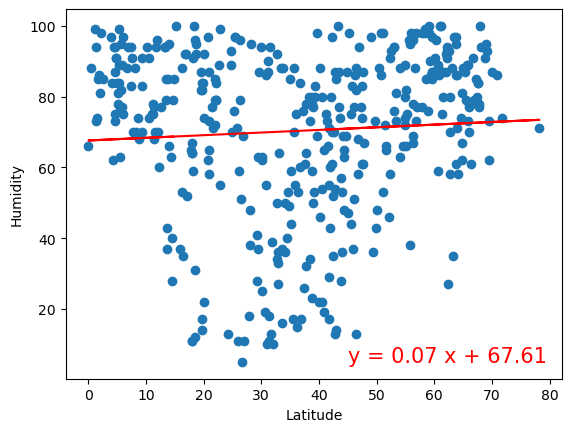

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, 'Humidity', (45,5))

The r-value is: -0.11307737977946496


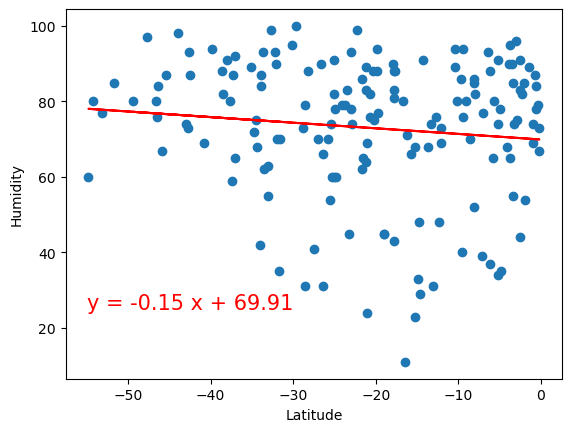

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, 'Humidity', (-55,25))

**Discussion about the linear relationship:** The linear regression line of humidity vs. latitude in the Northern Hemisphere has a very weak positive relationship, indicated by the slope of 0.07 which is close to zero. The increase in humidity with increasing latitude is nearly insignificant in the Nothern Hemisphere based on this regression model. The linear regression line of humidity vs. latitude in the Southern Hemisphere has a very weak negative relationship. Similar to the Northern Hemisphere, the slope of -0.15 indicates a slightly negative relationship, meaning that there is a very small tendency for humidity to decrease slightly as you move southward; however, the relationship is nearly insignificant based on this regression model.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.10352137613412872


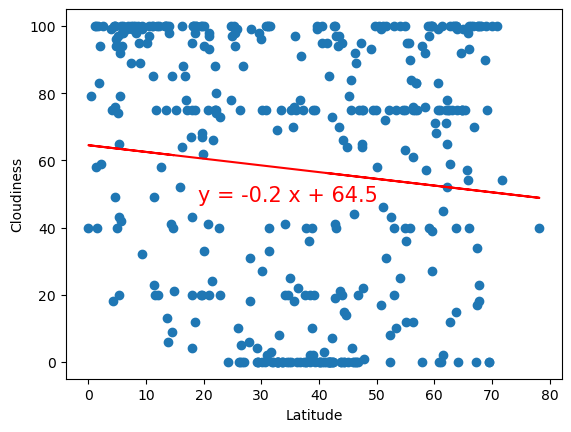

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, 'Cloudiness', (19,48))

The r-value is: -0.19991907811906826


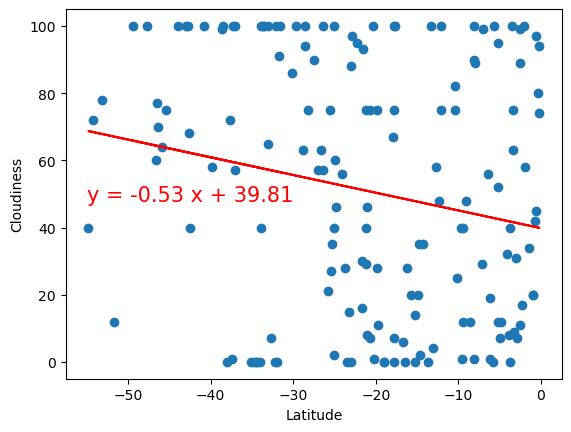

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,48))

**Discussion about the linear relationship:** The linear regression line of cloudiness vs. latitude in the Northern Hemisphere has a weak negative linear relationship. The negative slope of -0.2 indicates that there is a slight tendency for cloudiness to decrease as you move northwards in the Northern Hemisphere. The effect of latitude on cloudiness is relatively small based on this regression model. The linear regression line of cloudiness vs. latitude in the Southern Hemisphere has a moderately negative linear relationship, meaning that there is an average tendency for cloudiness to decrease as you move away from the equator towards higher latitudes in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.161453121875176


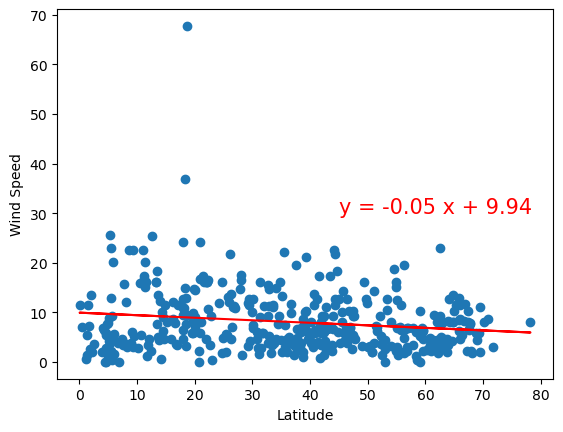

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, 'Wind Speed', (45,30))

The r-value is: -0.059450069198962584


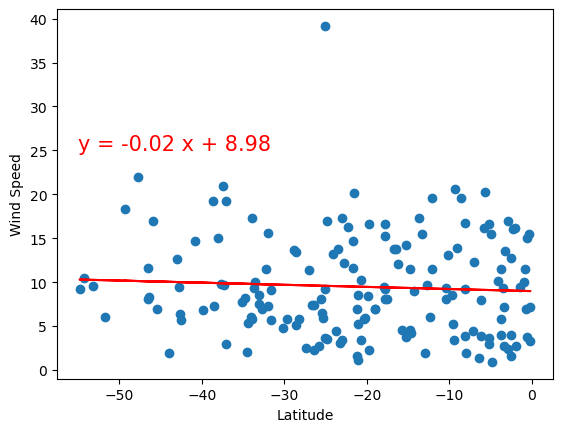

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, 'Wind Speed', (-55,25))

**Discussion about the linear relationship:** The linear regression line of wind speed vs. latitude in the Northern Hemisphere has a very weak negative relationship, indicated by the slope of -0.05 which is close to zero. There is a very small tendency for wind speed to decrease slightly as you move northwards in the Northern Hemisphere, but not enough of a relationship to be significant. The same is true for the linear regression line of wind speed vs. latitude in the Southern Hemisphere. The effect of latitude on wind speed is almost insignificant based on this regression model with a slope of -0.02.